## Author - Nitin
## Data Science and Machine Learning
## Task – 2  EDA on Netflix Data.


## Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Reading data

In [2]:
data = pd.read_csv('netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
data.iloc[[5541,5794,5813],:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


### Fix some data misplacement

In [5]:
df = data.copy()
df.iloc[[5541,5794,5813],9] = df.iloc[[5541,5794,5813],8]
df.iloc[[5541,5794,5813],8] = np.nan
df.iloc[[5541,5794,5813],:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [6]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            14
duration         220
listed_in        514
description     8775
dtype: int64

In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Observations:

* We have mainly two types of content on the netflix - Movies and TV Shows.
* Only 'release_year' is of the integer type.
* Data of the 'duration' column is misplaced in the 'rating' column for three above specified rows.
* Netflix covered around 750 different countries all over the world.

# Handling Missing Data

In [8]:
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df.dropna(subset=['date_added','rating'], inplace=True)
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Observations:

* There are some missing values in 'cast', 'country', 'director', 'date_added', and 'rating' columns.
* As the missing values of 'date_added' and 'rating' columns are negligible, so we have dropped them without worries!

# Add some new columns : month_added and year_added

In [9]:
df['year_added'] = df['date_added'].apply(lambda x : x.split(',')[-1])
df['month_added'] = df['date_added'].apply(lambda x : x.split()[0])
df['year_added'] = df['year_added'].apply(int)

# Some queries on the dataset :
### Q.1) Movies vs TV shows - Which type of content Netflix have the most?

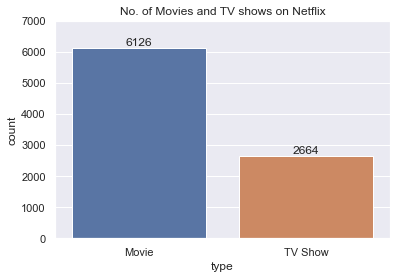

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
ax = sns.countplot(x='type',data=df)
ax.set_ylim(0,7000)
ax.bar_label(ax.containers[0])

plt.xlabel("type")
plt.title('No. of Movies and TV shows on Netflix')
plt.show()

Observations:

* Netflix has more Movies compared to TV shows
* Movie and TV show ratio = 70:30 (approx.)

### Q.2) How many TV shows and movies are added : year-wise and month-wise?

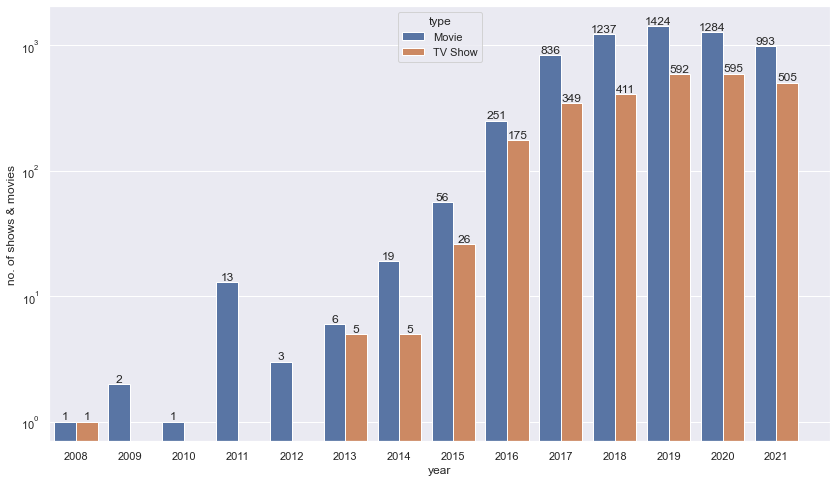

In [11]:
d_data = df.copy()
y_data = d_data[['year_added','type']].value_counts().sort_index()
y_data = y_data.reset_index(level=1,name='count')

plt.figure(figsize=(14,8))
ax = sns.barplot(x=y_data.index,y='count',hue='type',data=y_data)

ax.set_xlim(-0.5,14)
ax.set_yscale('log')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.xlabel('year')
plt.ylabel('no. of shows & movies')
plt.show()

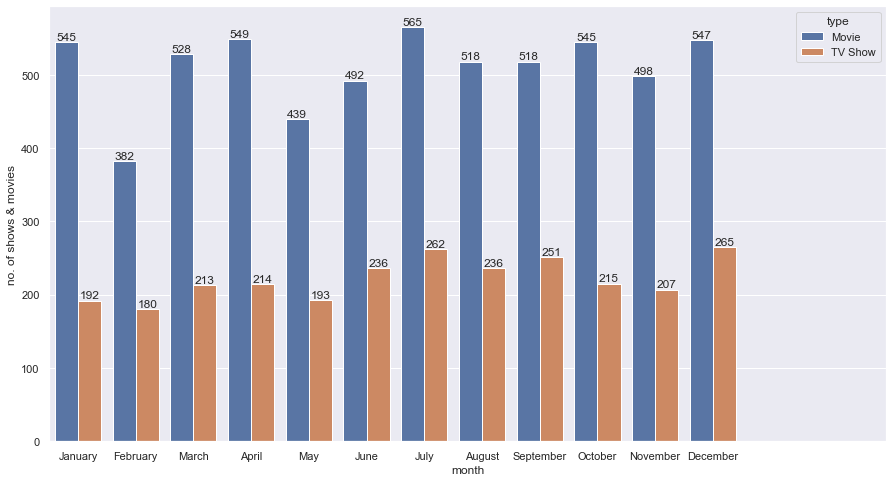

In [12]:
m_data = d_data[['month_added','type']].value_counts()
m_data = m_data.reset_index(level=1,name='count')
m_data = m_data.loc[['January','February','March','April','May','June','July','August','September','October','November','December']]

plt.figure(figsize=(15,8))
ax = sns.barplot(x=m_data.index,y='count',hue='type',data=m_data)

ax.set_xlim(-0.5,14)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.xlabel('month')
plt.ylabel('no. of shows & movies')
plt.show()

Observations:

* Whether it is monthly or yearly, number of Movies added are always greater than the TV shows on the NETFLIX.
* In 2016, the rate of uploading content becomes more than 5 times!

### Q.3) Which Movies and TV Shows have the longest duration?

In [13]:
d_data = df.copy()
d_data.duration = d_data.duration.apply(lambda x:int(x.split()[0]))
movie = d_data[d_data.type=='Movie']
tvshow = d_data[d_data.type=='TV Show']

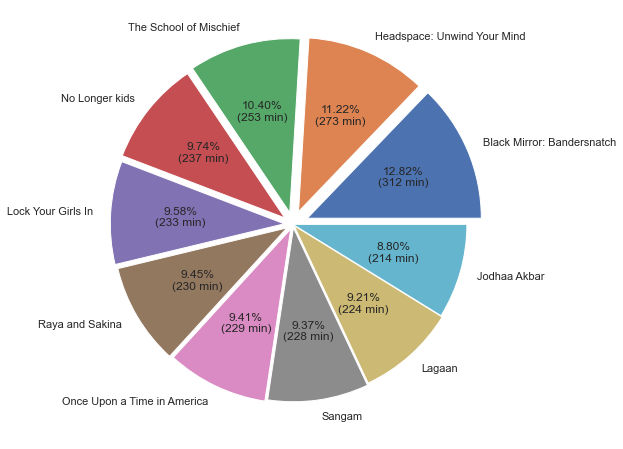

In [14]:
m = movie.sort_values(by='duration', ascending=False)[['title','duration']].head(10)
m = pd.DataFrame(m)

def fun(pct, data):
    absolute = int(np.round(pct/100.*np.sum(data)))
    return "{:.2f}%\n({:d} min)".format(pct, absolute)

plt.figure(figsize=(15,8))
ax=plt.pie(x=m.duration, labels=m.title, autopct=lambda x:fun(x,m.duration),
           explode=[0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.0])
plt.show()

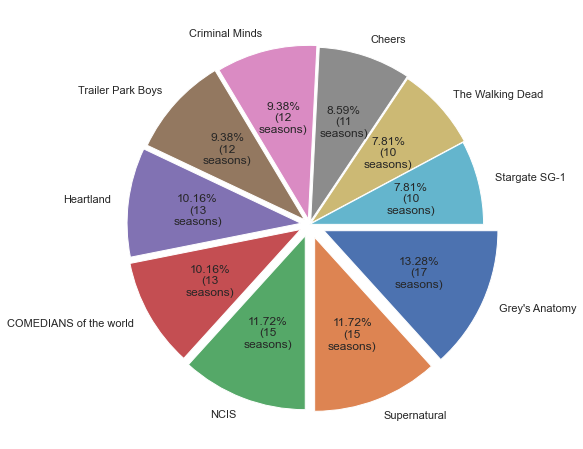

In [15]:
t = tvshow.sort_values(by='duration', ascending=False)[['title','duration']].head(10)
t = pd.DataFrame(t)

def fun(pct, data):
    absolute = int(np.round(pct/100.*np.sum(data)))
    return "{:.2f}%\n({:d}\nseasons)".format(pct, absolute)

plt.figure(figsize=(15,8))
ax=plt.pie(x=t.duration, labels=t.title, autopct=lambda x:fun(x,t.duration),counterclock=False,
           explode=[0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.0])
plt.show()

### Q.4) Which country has the most content uploaded on the Netflix?

In [16]:
idx = d_data[d_data.country=='Unknown'].index
count = d_data.drop(index=idx)
count = count.value_counts(subset=['country','type']).reset_index(name='count')

count_df = pd.DataFrame(count)
m_df = count_df[count_df.type.str.contains('Movie')].iloc[:5,:]
t_df = count_df[count_df.type.str.contains('TV Show')].iloc[:5,:]

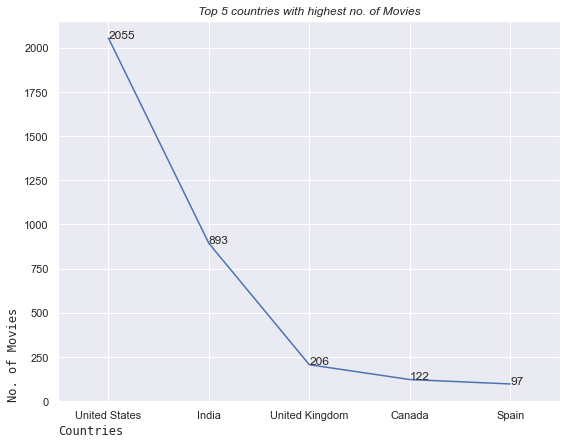

In [17]:
plt.figure(figsize=(9,7))
ax = sns.lineplot(x='country', y='count', data=m_df)
ax.set_xlim(-0.5,4.5)

for x,y in m_df[['country','count']].values:
    ax.text(x,y,y)

plt.title('Top 5 countries with highest no. of Movies',fontstyle='oblique')
plt.xlabel('Countries',loc='left',fontname = 'monospace')
plt.ylabel('No. of Movies',loc='bottom',fontname = 'monospace')
plt.show()

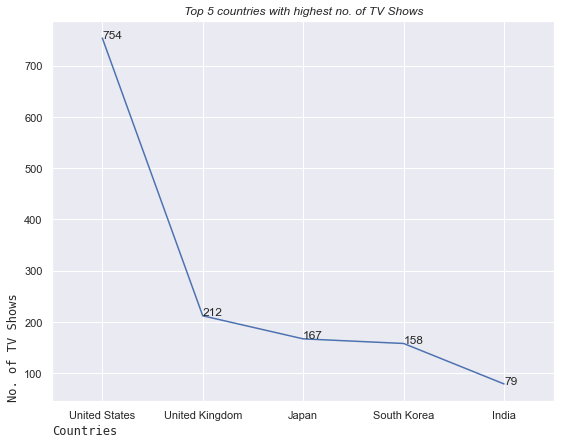

In [18]:
plt.figure(figsize=(9,7))
ax = sns.lineplot(x='country', y='count', data=t_df)
ax.set_xlim(-0.5,4.5)

for x,y in t_df[['country','count']].values:
    ax.text(x,y,y)

plt.title('Top 5 countries with highest no. of TV Shows',fontstyle='oblique')
plt.xlabel('Countries',loc='left',fontname = 'monospace')
plt.ylabel('No. of TV Shows',loc='bottom',fontname = 'monospace')
plt.show()

Observations:

* U.S. ia at the first place in terms of amount of content uploaded on the Netflix(for both categories).
* By the way, our India is also placed in top 5, yay!

# CONCLUSIONS

I have learned so many excellent skills like - data cleaning, data analyzing, data visualization, and why selection of a quality dataset is very important for further processes. If we selected the wrong one, then we should pay a good price for it by externally gathering some of the missing data, calculating the value of the missing data, etc. Due to the "bad" dataset, we have to suffer consequences like - lack of the actual information, limited amount of insights from the data, etc. Therefore, we should select a dataset very carefully!

Now comes the data cleaning part. In this phase, we learned about different methods to detect and handle the missing values of the dataset. We have various amazing functions available for that which converts this phase into a real fun. After this, we should know some methods for extracting the hidden information from our dataset. To analyse the data, different steps are followed like - creating a Dataframe, maniplute it by performing various functions on it, adding or deleting rows/columns, merge two or more Dataframes, break/squeeze a single Dataframe into small part which is called Series(an instance of Dataframe), and many more. These two phases are very important part of the Data Analysis and the libraries used are : Regex, NumPy and Pandas.

Visualization is the easiest and fastest way to understand anything. Here, we have learned about different types of graphs and plots which makes the analysis more effective. The amazing use of Matplotlib and Seaborn libraries makes this phase very interesting and beautiful. So, we learned how to draw line-chart, pie-chart, bar-graph, histogram, etc. I am delighted to have this course as my skills are brushed-up to shine!
